# HR Analytics Project

Attrition in HR

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
HR=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
#Lets see how data looks 
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
# Lets look bottom rows
HR.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


The variables of the HR dataset are the following:

Categorical: Attrition, BusinessTravel, Department, Education Field

Numerical: 'Age', 'DailyRate','DistanceFromHome', 'Education', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'

Target Variable:Attrition (Yes/No)

Text(0.5, 1.0, 'Attrition Distribution')

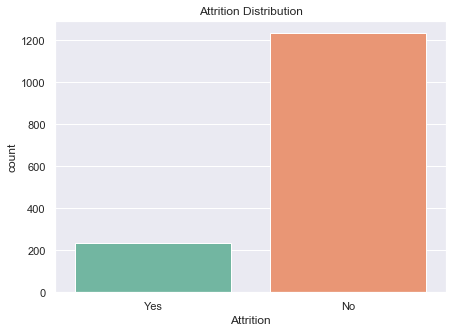

In [6]:
# Visual Representation of the dependent variable distribution in the dataset
sns.set(rc={'figure.figsize':(7,5)})
HR_c=HR['Attrition']
sns.countplot(x=HR_c, data=HR, palette="Set2")
plt.title("Attrition Distribution")

The count distribution indicates in the provided dataset Employee Leaving the company is relatively low as compared to the retained in the company. We can not say anything just looking the count plot, what if company is loosing the most efficient employees of the company where major piplines of the company work flow depend on the not retained employees.

Text(0.5, 1.0, 'Department Distribution')

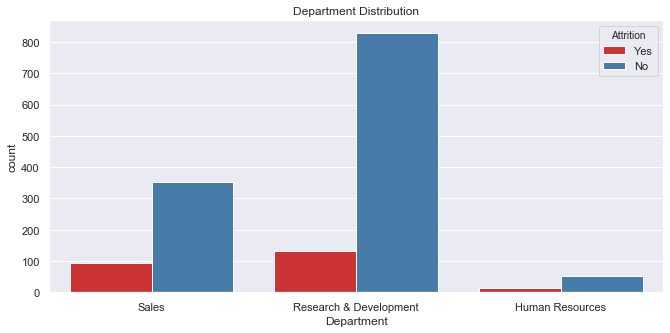

In [7]:
sns.set(rc={'figure.figsize':(11,5)})
HR_c=HR['Department']
sns.countplot(x=HR_c, data=HR, hue= 'Attrition', palette="Set1")
plt.title("Department Distribution")

Above graph shows highest employees count in Research and Development Department followed by Sales. Few employees in Human Resources.

Text(0.5, 1.0, 'Business Travel Distribution')

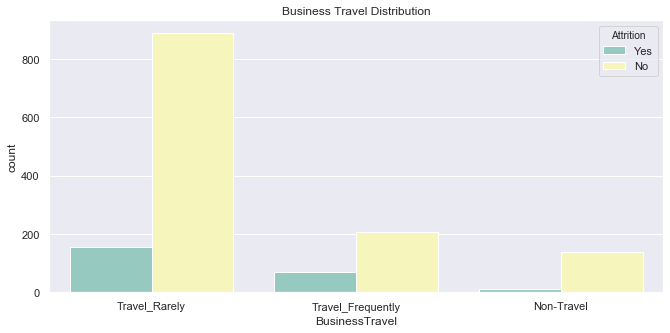

In [8]:
sns.set(rc={'figure.figsize':(11,5)})
HR_c=HR['BusinessTravel']
sns.countplot(x=HR_c, data=HR, hue= 'Attrition', palette="Set3")
plt.title("Business Travel Distribution")

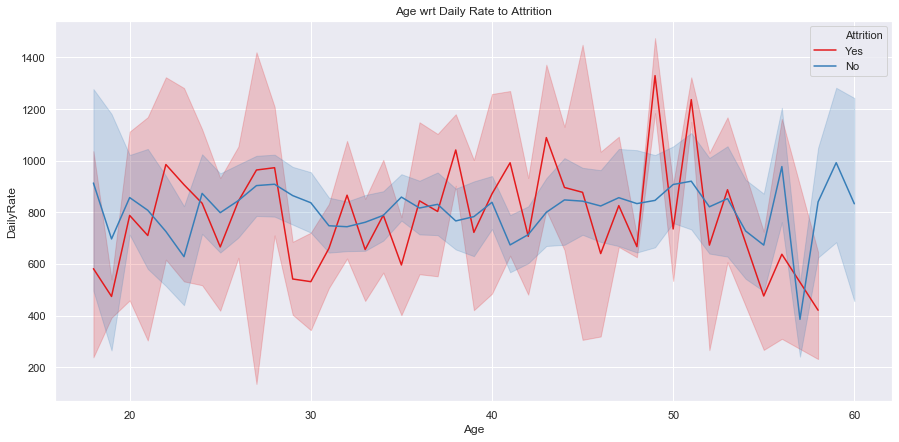

In [9]:
# Violin plot  
fig, ax = plt.subplots(figsize=(15, 7))  
sns.lineplot(x='Age', y='DailyRate', hue='Attrition', data=HR, ax=ax,palette="Set1" )  
ax.set_title('Age wrt Daily Rate to Attrition')  
plt.show()  

It indicates Attriation is high age onward 37 to 52 and this age group Daily rate is high too.

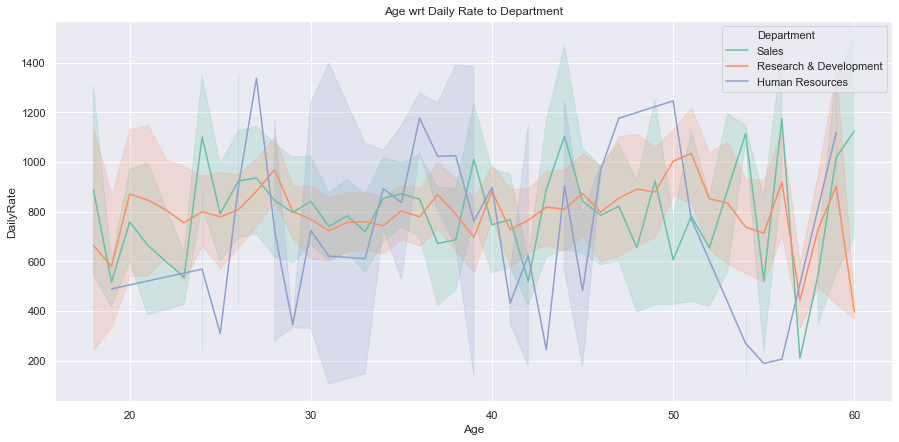

In [10]:
# Violin plot  
fig, ax = plt.subplots(figsize=(15, 7))  
sns.lineplot(x='Age', y='DailyRate', hue='Department', data=HR, ax=ax,palette="Set2" )  
ax.set_title('Age wrt Daily Rate to Department')  
plt.show()

It shows Human Resources are hightest paid deparment followed by Sales. R&D Daily Payrate somewhere in between other two department. R&D department shows relatively constant trend arcoss all the age group. Pay rate in R&D and HR starts reducing after 50 whereas Sales is showing quite high and low trend. 

Text(0.5, 1.0, 'Education Distribution Across Attrition')

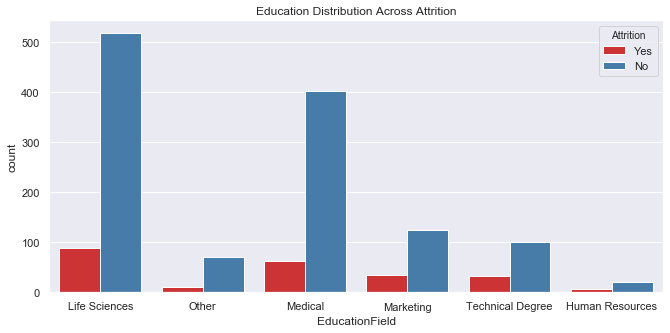

In [11]:
sns.set(rc={'figure.figsize':(11,5)})
HR_c=HR['EducationField']
sns.countplot(x=HR_c, data=HR, hue= 'Attrition', palette="Set1")
plt.title("Education Distribution Across Attrition")

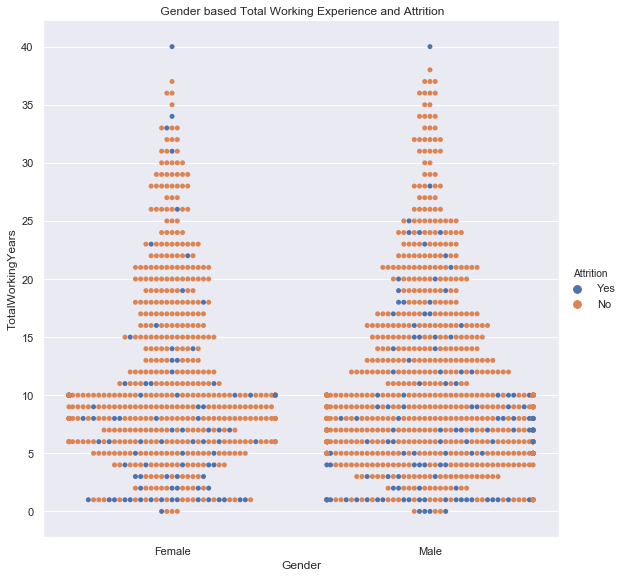

In [12]:
# Plot Total working experience based on gender wrt Attrition 
sns.catplot(x="Gender", y="TotalWorkingYears", data=HR, kind="swarm", 
            hue= 'Attrition', height=8, aspect=1)
                                                     
plt.title(' Gender based Total Working Experience and Attrition') 
plt.show()

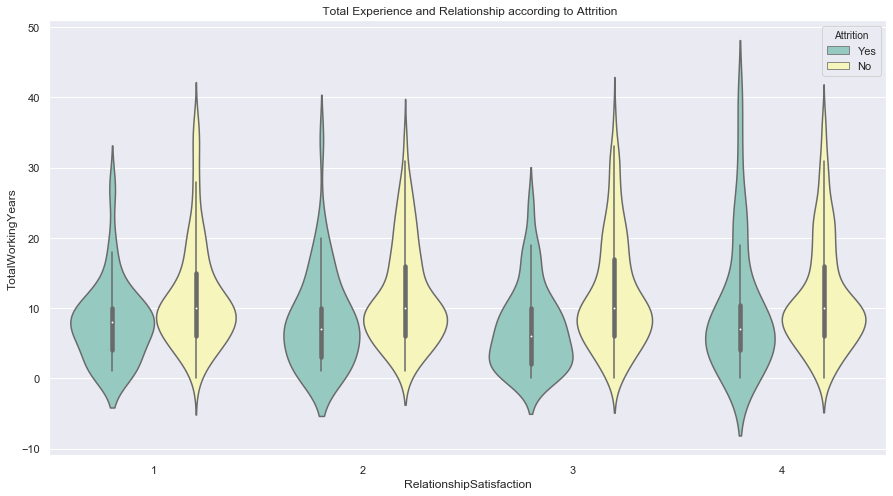

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.violinplot(y='TotalWorkingYears', x='RelationshipSatisfaction', hue='Attrition', data=HR, ax=ax, palette="Set3")  
ax.set_title(' Total Experience and Relationship according to Attrition')  
plt.show() 

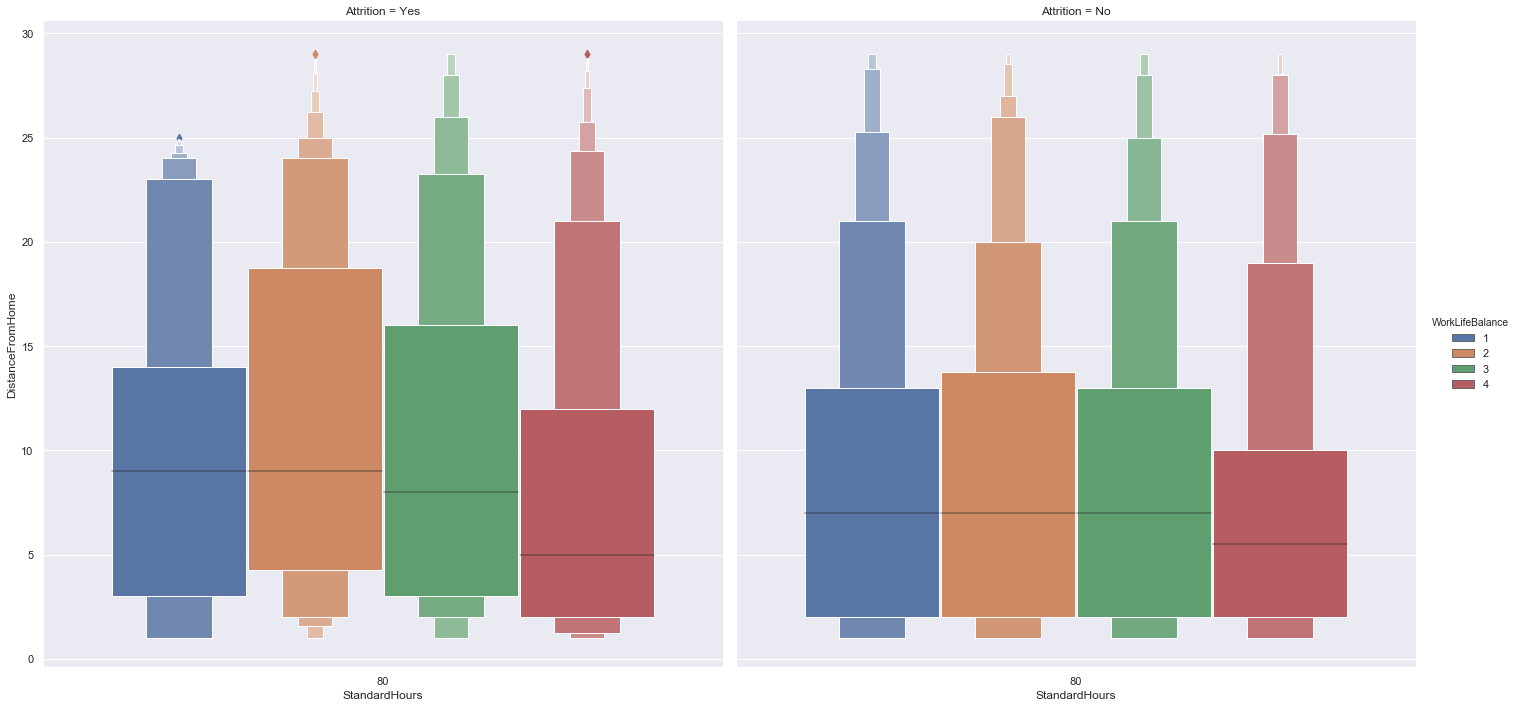

In [14]:
sns.catplot(x="StandardHours", y="DistanceFromHome", hue="WorkLifeBalance",
                col="Attrition", data=HR,
                height=10, aspect=1, kind="boxen")

Graph shows employees who lives in close proximity have more work life balance. 

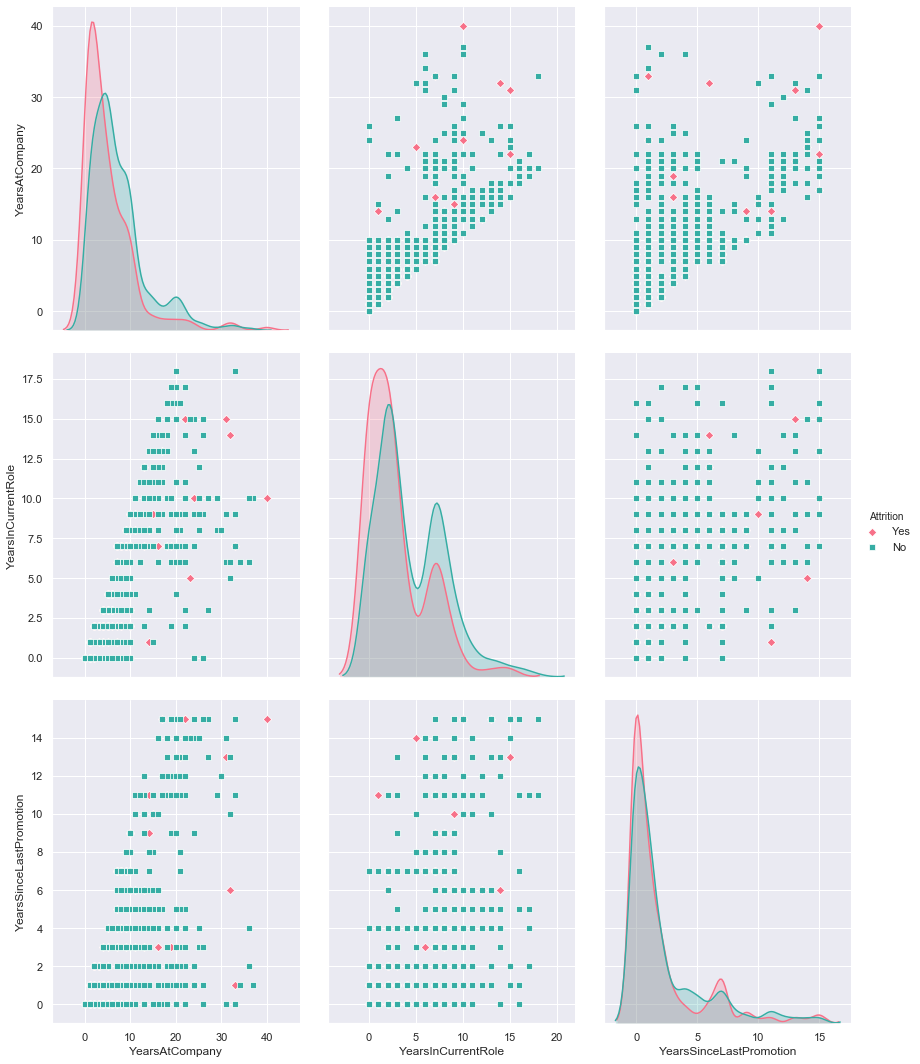

In [15]:
sns.pairplot(HR, vars = ["YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion"], 
             hue="Attrition",  palette="husl", diag_kind = 'kde', markers=["D", "s"],  height=5, aspect=0.8)

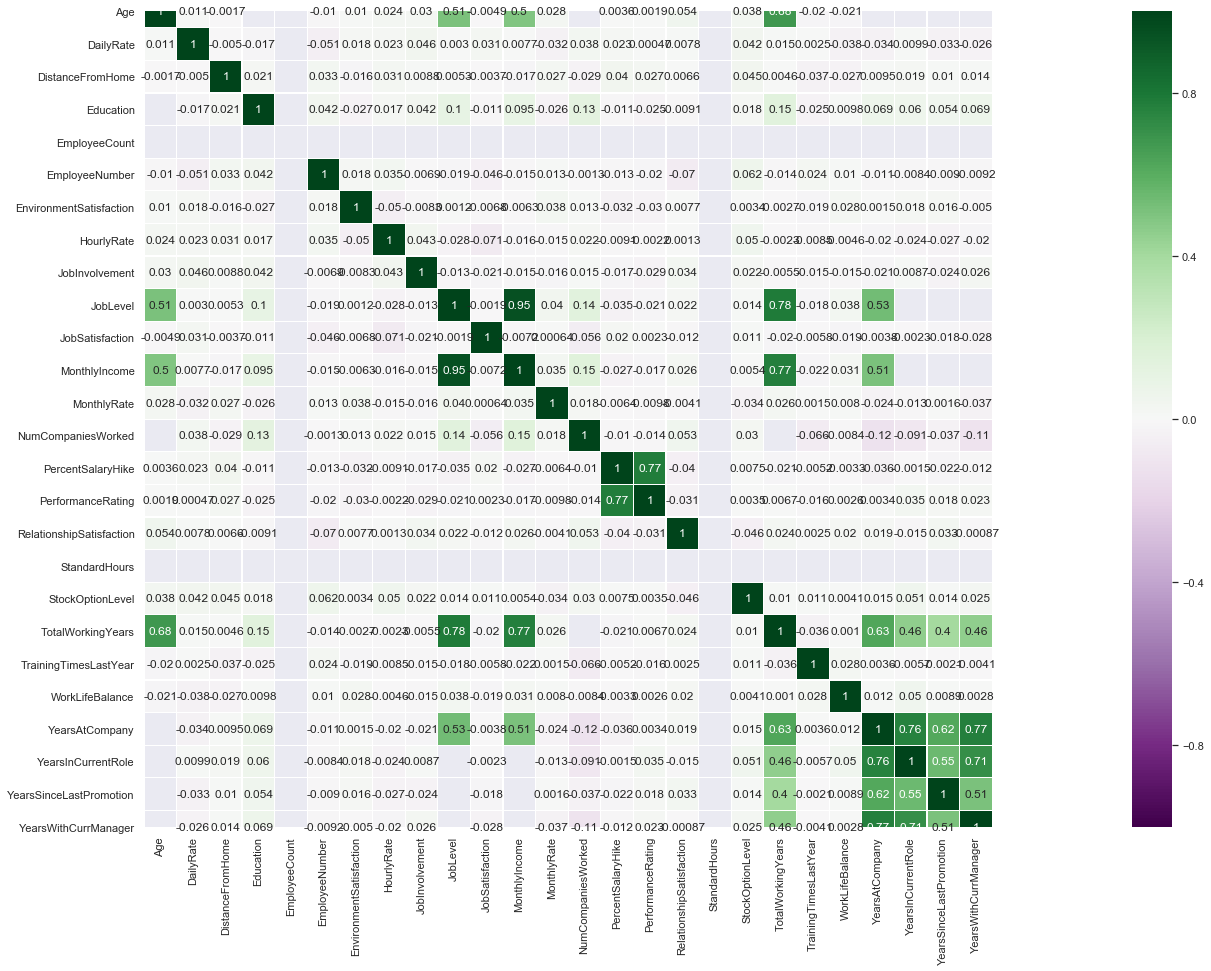

In [16]:
# Analysis the correlation in the HR dataset
HR_corr = HR.corr()

plt.figure(figsize=(50, 15))

sns.heatmap(HR_corr[(HR_corr >= 0.4) | (HR_corr <= 0.2)], 
            cmap='PRGn', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)
plt.show()

In [17]:
# Lets have quick look in null values 
HR.isnull().sum()
# No null values detected 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Lets See counts of catagorical columns in the dataset (This will help us to choose best possible Encoder in the following step)

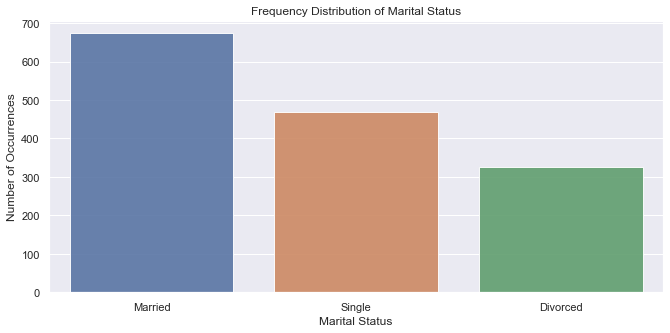

In [18]:
# Lets See counts of catagorical columns (This will help us to choose best possible Encoder in next step)
MaritalStatus_count = HR['MaritalStatus'].value_counts()
sns.set(style="darkgrid")
sns.barplot(MaritalStatus_count.index, MaritalStatus_count.values, alpha=0.9)
plt.title('Frequency Distribution of Marital Status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)
plt.show()

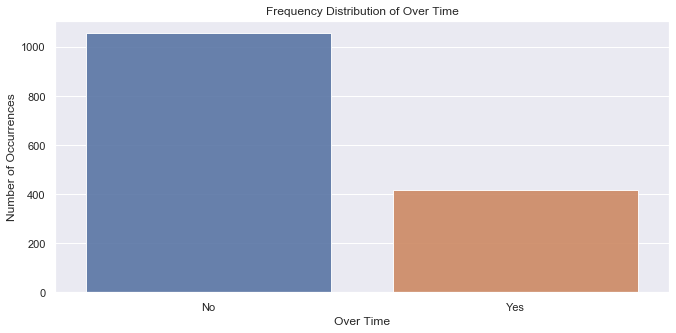

In [19]:
Overtime_count = HR['OverTime'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Overtime_count.index, Overtime_count.values, alpha=0.9)
plt.title('Frequency Distribution of Over Time')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Over Time', fontsize=12)
plt.show()

In [20]:
print(HR['Over18'].value_counts())
#All are over 18 in the company

Y    1470
Name: Over18, dtype: int64


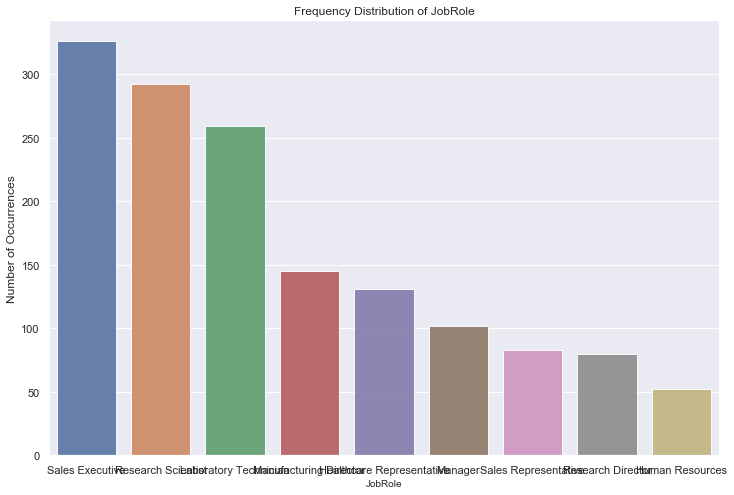

In [21]:
plt.figure(figsize=(12, 8))
JobRole_count = HR['JobRole'].value_counts()
sns.set(style="darkgrid")
sns.barplot(JobRole_count.index, JobRole_count.values, alpha=0.9)
plt.title('Frequency Distribution of JobRole')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('JobRole', fontsize=10)
plt.show()

In [22]:
#Lets replace Attrition with 0 and 1
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()
HR['Attrition']=labelencoder.fit_transform(HR['Attrition'])
HR['Gender']=labelencoder.fit_transform(HR['Gender'])
HR['Over18']=labelencoder.fit_transform(HR['Over18'])
HR['OverTime']=labelencoder.fit_transform(HR['OverTime'])
HR['MaritalStatus']=labelencoder.fit_transform(HR['MaritalStatus'])
HR['Department']=labelencoder.fit_transform(HR['Department'])
HR['EducationField']=labelencoder.fit_transform(HR['EducationField'])
HR['BusinessTravel']=labelencoder.fit_transform(HR['BusinessTravel'])
HR['JobRole']=labelencoder.fit_transform(HR['JobRole'])
HR

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [23]:
print(HR.info()), print(HR.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null int32
DailyRate                   1470 non-null int64
Department                  1470 non-null int32
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int32
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int32
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int32
MonthlyIncome               1

(None, None)

In [24]:
# Split features and target class from the dataset for the training purposes 
features = HR.drop('Attrition', axis = 1)
target = HR['Attrition']

In [25]:
from sklearn.preprocessing import  StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  train_test_split, cross_val_score

standardScale = StandardScaler()
standardScale.fit_transform(features)

selectkBest = SelectKBest()
features_new = selectkBest.fit_transform(features, target)

# Lets Perform Various Model Training!

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_new,target,test_size=0.22,random_state=42)

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

In [28]:
models = []
models.append(("KNN",KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("LGBM", LGBMClassifier()))
models.append(("ADA",AdaBoostClassifier()))
models.append(("RF", RandomForestClassifier()))

In [29]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=7, random_state=52)
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())
print('******************************************************************************************************')
for i in range(len(names)):
    print(names[i],results[i].std())

KNN 0.8062728458134714
GNB 0.7617248455569569
DT 0.7896314743164959
XGB 0.8525362860990573
LGBM 0.8420352279771702
ADA 0.8498963254312647
RF 0.8551281503174366
******************************************************************************************************
KNN 0.030410892649479358
GNB 0.05773150159599614
DT 0.03246555770495072
XGB 0.020441444366625944
LGBM 0.026725145444053862
ADA 0.02120873728099238
RF 0.023359630227065564


Out of all Classification Model XGB and RF performed well. Lets Proceed further with these two model and find best parameters using GridSearch Library. 

In [30]:
# Specify parameters and distributions for Random Forest
rf_classification = RandomForestClassifier()
param_dist = dict(n_estimators=list(range(1,100)),
                  max_depth=list(range(1,100)),
                  min_samples_leaf=list(range(1,10)), random_state=list(range(42,242)), bootstrap=[True, False],
                  criterion = ["gini", "entropy"])
start_time = time.time()
rand_rf = RandomizedSearchCV(rf_classification, param_dist, cv=10)
rand_rf.fit(x_train, y_train)
training_time = time.time() - start_time
best_rf_classification = rand_rf.best_params_


print("Taining Time: ",training_time)
print("Best Parameters for Random Forest: ",best_rf_classification)

Taining Time:  10.27161979675293
Best Parameters for Random Forest:  {'random_state': 49, 'n_estimators': 79, 'min_samples_leaf': 3, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}


*Test Accuracy: 86.73%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       283
           1       0.38      0.07      0.12        41

    accuracy                           0.87       324
   macro avg       0.63      0.53      0.53       324
weighted avg       0.82      0.87      0.83       324



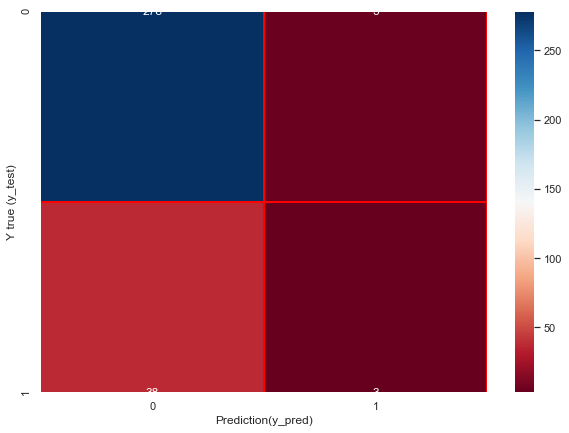

In [34]:
rf_ = RandomForestClassifier(random_state=49, n_jobs=-1,
                            n_estimators=79, min_samples_leaf = 3, 
                            max_depth=4, criterion='entropy', bootstrap=True )
rf = rf_.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("*Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))
print("Classification Report: \n {}".format (classification_report(y_test, y_pred_rf)))

# visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_matrix,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax, cmap='RdBu')
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Y true (y_test)")
plt.show()

In [33]:
# Lets tune XGBClassifier and specify parameters and distributions
# A parameter grid for XGBoost
xgb_ = XGBClassifier()
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
start_time = time.time()
rand_xgb= RandomizedSearchCV(xgb_, params, cv=10)
rand_xgb.fit(x_train, y_train)
training_time = time.time() - start_time
best_xgb_classification = rand_xgb.best_params_


print("Taining Time: ",training_time)
print("Best Parameters for Random Forest: ",best_xgb_classification)

Taining Time:  10.26928997039795
Best Parameters for Random Forest:  {'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 0.8}


*Test Accuracy: 86.73%
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       283
           1       0.39      0.17      0.24        41

    accuracy                           0.86       324
   macro avg       0.64      0.57      0.58       324
weighted avg       0.83      0.86      0.84       324



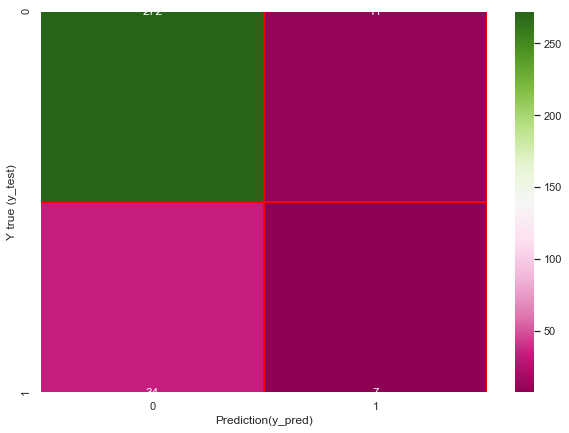

In [35]:
xgb_ = XGBClassifier(subsample= 0.8, min_child_weight=10, max_depth= 5, gamma= 2, colsample_bytree=1.0)
xgb = xgb_.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print("*Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))
print("Classification Report: \n {}".format (classification_report(y_test, y_pred_xgb)))

# visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_matrix,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax, cmap='PiYG')
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Y true (y_test)")
plt.show()

Both the Classifiers (Random Forest, XGBosting) provided almost similar results around 87% of accuracy.

In [36]:
# Create the submission file using XGB Model and submit!
preds = pd.DataFrame(y_pred_xgb, columns=['Attrition_Pred'])
preds.to_csv('Attrition_Pred.csv')

In [37]:
# Lastly Save the model for futher use
from sklearn.externals import joblib 
joblib.dump(xgb_ , 'HR_Attrition.pkl')

['HR_Attrition.pkl']